In [25]:
from surface_roughness import Surface
import numpy as np
from scipy.stats import shapiro, kstest, norm, gaussian_kde, probplot
import matplotlib.pyplot as plt

surface = Surface(path='example_surface.stl')

In [2]:
v0 = surface.points[surface.triangles[:,0]]
v1 = surface.points[surface.triangles[:,1]]
v2 = surface.points[surface.triangles[:,2]]

v1v0 = v1 - v0
v2v0 = v2 - v0

normals = np.cross(v1v0,v2v0,axisa=1,axisb=1)

areas = np.linalg.norm(normals,axis=1)
print(areas)
normals /= areas[:,np.newaxis]
print(normals)

[0.04934573 0.04729415 0.022432   ... 0.06028062 0.06245704 0.0446357 ]
[[ 0.06985742  0.06810488  0.99522945]
 [ 0.16007916  0.13612797  0.97767266]
 [ 0.19769169  0.10317618  0.9748193 ]
 ...
 [ 0.2379187   0.08708326  0.96737335]
 [ 0.21033365  0.10238662  0.97225343]
 [ 0.14691056 -0.10905404  0.98311978]]


In [3]:
shear_dir = np.array([1,0,0])

proj = np.zeros_like(normals)
proj[:,0] = normals[:,0] - (shear_dir[1]**2*normals[:,0] - shear_dir[0]*shear_dir[1]*normals[:,1])
proj[:,1] = normals[:,1] - (shear_dir[0]*shear_dir[1]*normals[:,0] + shear_dir[0]**2 * normals[:,1])
proj[:,2] = normals[:,2]

proj /= np.linalg.norm(proj,axis=1)[:,np.newaxis]
app_dip = np.arccos(proj[:,0]*shear_dir[0]+proj[:,1]*shear_dir[1])-np.pi/2
print(app_dip)

[-0.07007734 -0.16229482 -0.20008477 ... -0.24115668 -0.21305301
 -0.1483354 ]


X:\python_env\roughness_build\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


16672
Shapiro-wilk stat: 0.9940964579582214 p-value: 2.1641218108570956e-25
Kolmogorov-Smirnov Stat: 0.353656835980412 P-value: 0.0
Mean: -0.007501416915011895 Std: 0.16830436971835047
Absmean: 0.13291298274089164 Std: 0.10352183895653837


(0.0, 2.4888682183452677)

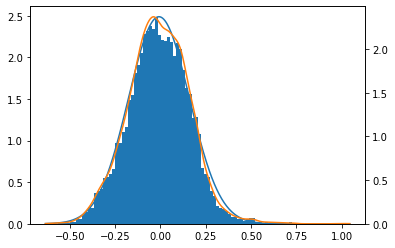

In [23]:
stat, pval = shapiro(app_dip)
print(len(app_dip))
print(f"Shapiro-wilk stat: {stat} p-value: {pval}")

ks_stat, ks_pval = kstest(app_dip,'norm')
print(f"Kolmogorov-Smirnov Stat: {ks_stat} P-value: {ks_pval}")

mean = np.mean(app_dip)
stdev = np.std(app_dip)

print(f"Mean: {mean} Std: {stdev}")
print(f"Absmean: {np.mean(np.abs(app_dip))} Std: {np.std(np.abs(app_dip))}")

x = np.linspace(app_dip.min(),app_dip.max(),500)
kern = gaussian_kde(app_dip)

plt.hist(app_dip,100,density=True)
plt.twinx()
plt.plot(x,norm.pdf(x,mean,stdev))
plt.plot(x,kern.evaluate(x))
ax = plt.gca()
ax.set_ylim(ymin=0)

((array([-3.93513679, -3.71671362, -3.59709581, ...,  3.59709581,
          3.71671362,  3.93513679]),
  array([-0.63388145, -0.6024796 , -0.59482874, ...,  1.00007082,
          1.03309479,  1.04517378])),
 (0.16783813481298832, -0.00750141691501183, 0.9970051300189283))

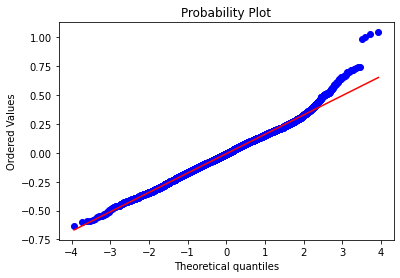

In [27]:
probplot(app_dip,dist="norm",plot=plt)